# Kmeans clustering
 Dataset KOS(Bag of Words) was taken from https://archive.ics.uci.edu/ml/machine-learning-databases/bag-of-words/

In [1]:
import numpy as np 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib
import pandas as pd

In [2]:
text_file=open("C:\\Users\\swami\\Desktop\docword.kos.txt","r")
lines = text_file.readlines()
text_file.close()
vocab=int(lines[1])
qwqw=[]

qwqw is a list of list containing details of every line extracted from the text file.
the columns of qwqw corresponds to document number , vocab number , frequency respectively.

In [3]:
for i in range(3,len(lines)):
    qwqw.append(lines[i].split(' '))
qaqa1=[]
qwqw[:5]

[['1', '61', '2\n'],
 ['1', '76', '1\n'],
 ['1', '89', '1\n'],
 ['1', '211', '1\n'],
 ['1', '296', '1\n']]

qaqa1 is a list of collection of frequency vector(list) for every document

In [4]:
qaqa1.append(np.zeros(vocab))
for i in range(len(qwqw)):
    qwqw[i][2]=int(qwqw[i][2])
    qwqw[i][0]=int(qwqw[i][0])
    qwqw[i][1]=int(qwqw[i][1])
a=1
for i in range(len(qwqw)):
    if qwqw[i][0]==a:
        qaqa1[a-1][qwqw[i][1]-1]=qwqw[i][2]
    else:
        qaqa1.append(np.zeros(vocab))
        a=a+1
        qaqa1[a-1][qwqw[i][1]-1]=qwqw[i][2]

qaqa1[:5]


[array([0., 0., 0., ..., 0., 1., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.])]

Applying TSNE

In [5]:
from random import sample
subset = sample(qaqa1, 800)
tsne = TSNE(n_components=2, verbose=1, perplexity=4, n_iter=300)
tsne_results = tsne.fit_transform(subset)
#taking a subset of the data considering the complexity of tsne function

clusterer = KMeans(n_clusters=5, random_state=57)
preds = clusterer.fit_predict(tsne_results)

score = silhouette_score (tsne_results, preds, metric="euclidean", sample_size=10000)
print("Silhouette score for 5 clusters is ", score)

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.282s...
[t-SNE] Computed neighbors for 800 samples in 8.040s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 1.788584
[t-SNE] KL divergence after 250 iterations with early exaggeration: 102.272377
[t-SNE] Error after 300 iterations: 3.047107
Silhouette score for 5 clusters is  0.36343038


C:\Users\swami\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Visualizing the results

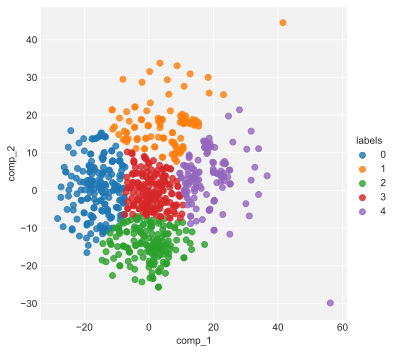

In [6]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

proj = pd.DataFrame(tsne_results)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = preds
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj ,fit_reg=False)